In [1]:
#conda install -c anaconda graphviz
#conda install -c conda-forge pydotplus

import numpy as np
import pandas as pd
dataset=pd.read_excel("/content/dt (1).xlsx")
dataset.head()

,Age,Incomr,Student,Credit_rating,Buys_computer
0,<30,high,no,fair,no
1,<30,high,no,excellent,no
2,30-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes


In [2]:
X=dataset.iloc[:,:-1]  #feature
feature_cols=['age','income','student','credit_rating']
Y=dataset.iloc[:,4].values  #classtables

from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
X=X.apply(LabelEncoder().fit_transform)

from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier(criterion='gini',max_depth=5,splitter='best')
X
regressor.fit(X,Y) #training of classifier

X_in=np.array([2,0,1,1]) #age= 30-40   income=low student-no   credit_rating=excellent
y_pred=regressor.predict([X_in])
print("Prediction: ",y_pred)

Prediction:  ['yes']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [3]:
X

,Age,Incomr,Student,Credit_rating
0,1,0,0,1
1,1,0,0,0
2,0,0,0,1
3,2,2,0,1
4,2,1,1,1
5,2,1,1,0
6,0,1,1,0
7,1,2,0,1
8,1,1,1,1
9,2,2,1,1


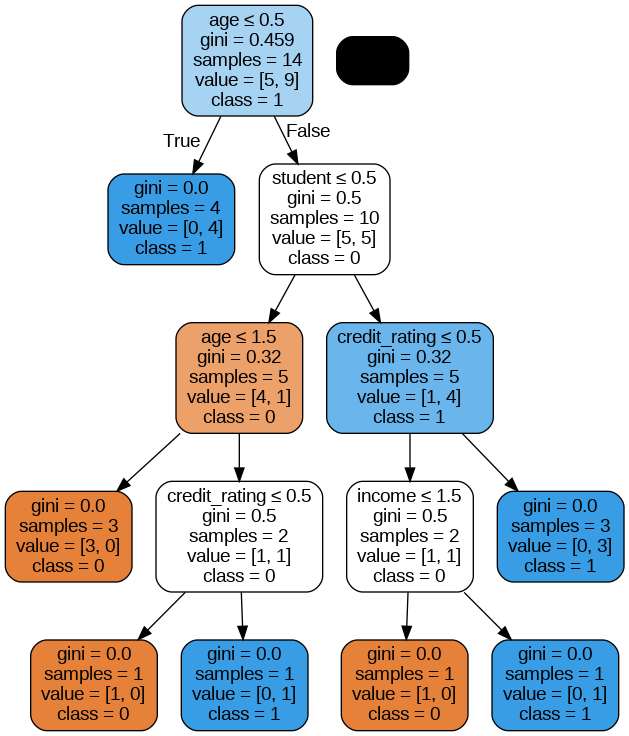

In [4]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
feature_cols=['age','income','student','credit_rating']
export_graphviz(regressor,out_file=dot_data, filled=True,rounded=True,special_characters=True,
                feature_names = feature_cols, class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")
Image(graph.create_png())